In [1]:
# Loading the required libraries
%pylab inline
import pandas as pd
import json
import numpy as np
import geopandas as gp
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading citibike files
citibike0115 = pd.read_csv("201501-citibike-tripdata.csv")
citibike0615 = pd.read_csv("201506-citibike-tripdata.csv")

In [3]:
# Checking dataframe information
print citibike0115.info()
print citibike0615.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285552 entries, 0 to 285551
Data columns (total 15 columns):
tripduration               285552 non-null int64
starttime                  285552 non-null object
stoptime                   285552 non-null object
start station id           285552 non-null int64
start station name         285552 non-null object
start station latitude     285552 non-null float64
start station longitude    285552 non-null float64
end station id             285552 non-null int64
end station name           285552 non-null object
end station latitude       285552 non-null float64
end station longitude      285552 non-null float64
bikeid                     285552 non-null int64
usertype                   285552 non-null object
birth year                 279924 non-null float64
gender                     285552 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 34.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 941219 entries, 0 to 

In [4]:
# Checking for first 5 rows of the dataframe
print citibike0115.head()
print citibike0615.head()

   tripduration      starttime       stoptime  start station id  \
0          1346  1/1/2015 0:01  1/1/2015 0:24               455   
1           363  1/1/2015 0:02  1/1/2015 0:08               434   
2           346  1/1/2015 0:04  1/1/2015 0:10               491   
3           182  1/1/2015 0:04  1/1/2015 0:07               384   
4           969  1/1/2015 0:05  1/1/2015 0:21               474   

        start station name  start station latitude  start station longitude  \
0          1 Ave & E 44 St               40.750020               -73.969053   
1          9 Ave & W 18 St               40.743174               -74.003664   
2     E 24 St & Park Ave S               40.740964               -73.986022   
3  Fulton St & Waverly Ave               40.683178               -73.965964   
4          5 Ave & E 29 St               40.745168               -73.986831   

   end station id             end station name  end station latitude  \
0             265     Stanton St & Chrystie St    

In [5]:
# Getting the unique/distinct values of a variable in dataframe
print len(citibike0115['start station id'].unique())
print len(citibike0615['start station id'].unique())

330
326


In [6]:
# Getting frequency distributions outputs for a variable in data frame
janFreq = citibike0115["start station id"].value_counts() # This output converts the variable as index
janFreq = janFreq.reset_index() # This will reset the variable index as a column
janFreq = janFreq.rename(columns={'index':'stnid', 0:'ridesFreq'}) # Renaming column names
print janFreq.info() # Checking final dataframe information

junFreq = citibike0615["start station id"].value_counts()
junFreq = junFreq.reset_index()
junFreq = junFreq.rename(columns={'index':'stnid', 0:'ridesFreq'})
print junFreq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 2 columns):
stnid        330 non-null int64
ridesFreq    330 non-null int64
dtypes: int64(2)
memory usage: 7.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 325
Data columns (total 2 columns):
stnid        326 non-null int64
ridesFreq    326 non-null int64
dtypes: int64(2)
memory usage: 7.6 KB
None


In [7]:
# Concatenating two frequency distributions: one from jan citibike data and other from jun citibike data
citibikedata = pd.concat([janFreq, junFreq], axis=0)
print citibikedata.info()
print len(citibikedata['stnid'].unique())

# Summing up total number of rides at unique start station id level after concatenating dataframes earlier
grouped = citibikedata.groupby('stnid') # Using groupby function of pandas
stnrides = grouped['ridesFreq'].agg(np.sum) # Applying groupby object on rides variable with sum aggregation
stnrides = stnrides.reset_index() # Resetting variable name index as a column in data frame
stnrides = stnrides.rename(columns={'index':'stnid', 0:'ridesFreq'}) # Renaming the variable names
print stnrides.info() # Checking final data frame information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 325
Data columns (total 2 columns):
stnid        656 non-null int64
ridesFreq    656 non-null int64
dtypes: int64(2)
memory usage: 15.4 KB
None
331
<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 330
Data columns (total 2 columns):
stnid        331 non-null int64
ridesFreq    331 non-null int64
dtypes: int64(2)
memory usage: 7.8 KB
None


In [8]:
# Reading in stations json file
stations = json.load(open('stationzips.json'))

# Creating empty arrays to extract keys and values from json file
statnid = np.array([])
zipcode = np.array([])

for k, v in stations.iteritems():
    statnid = np.append(statnid ,k)
    zipcode = np.append(zipcode, v)

print len(statnid)
print len(zipcode)
print type(statnid)
print type(zipcode)

# Converting numpy arrays to pandas data frames
statnid = pd.DataFrame(statnid)
zipcode = pd.DataFrame(zipcode)

# Merging both dataframes into one using index as common key
stationzips = pd.merge(statnid, zipcode, left_index=True, right_index=True)
stationzips = stationzips.rename(columns={'0_x':'stnid', '0_y':'zipcode'}) # Renaming column names
stationzips['stnid'] = stationzips['stnid'].astype('float64') # Converting to float data types
print stationzips.info()
print stationzips.head()

461
461
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 2 columns):
stnid      461 non-null float64
zipcode    460 non-null float64
dtypes: float64(2)
memory usage: 10.8 KB
None
   stnid  zipcode
0    344    11216
1    345    10011
2    346    10014
3    347    10014
4    340    10002


In [9]:
# Merging station level frequency distribution output to station level zipcode information from json file
bikezipdata = pd.merge(stnrides, stationzips, on='stnid', how='left')
bikezipdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 330
Data columns (total 3 columns):
stnid        331 non-null int64
ridesFreq    331 non-null int64
zipcode      330 non-null float64
dtypes: float64(1), int64(2)
memory usage: 10.3 KB


In [10]:
# Checking some general information
print len(bikezipdata['zipcode'].unique())
print bikezipdata['zipcode'].unique()
bikezipdata.head()

32
[ 10019.  10013.  10038.  11217.  10011.  11205.  11238.  10014.  10022.
  11201.  10007.  10009.  10012.  10016.  10017.  10005.  10003.  10004.
  10002.  10018.  11211.     nan  10282.  11251.  11216.  10280.  10001.
  10010.  10036.  10023.     83.  10281.]


stnid  ridesFreq  zipcode
0     72       3405    10019
1     79       2990    10013
2     82       1256    10038
3     83       1252    11217
4    116       6496    10011

In [11]:
# Aggregating bike rides at a zipcode level (this is the final output format required: rides at zipcode level)
grouped = bikezipdata.groupby('zipcode')
zipcoderides = grouped['ridesFreq'].agg(np.sum)
zipcoderides = zipcoderides.reset_index()
zipcoderides = zipcoderides.rename(columns={'index':'stnid', 0:'ridesFreq'})
print zipcoderides.info()
print zipcoderides[0:1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
zipcode      31 non-null float64
ridesFreq    31 non-null int64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes
None
   zipcode  ridesFreq
0       83       5847


In [12]:
# Reading shape file data from PLUTO dataset
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [13]:
print bsize.info()
print len(bsize['ZipCode'].unique())

# Aggregating units at zipcode level (this is the final output format required: units at zipcode level)
grouped = bsize.groupby('ZipCode')
zipunits = grouped['UnitsTotal'].agg(np.sum)
zipunits = zipunits.reset_index()
zipcodeunits = zipunits.rename(columns={'ZipCode':'zipcode', 'UnitsTotal':'totUnits'})
print len(zipcodeunits['zipcode'].unique())
print zipcodeunits.info()
print zipcodeunits.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 42786 entries, 0 to 42785
Data columns (total 87 columns):
APPBBL        42786 non-null float64
APPDate       4577 non-null object
Address       42736 non-null object
AllZoning1    42743 non-null object
AllZoning2    3674 non-null object
AreaSource    42786 non-null object
AssessLand    42786 non-null float64
AssessTot     42786 non-null float64
BBL           42786 non-null float64
BldgArea      42786 non-null int64
BldgClass     42736 non-null object
BldgDepth     42786 non-null float64
BldgFront     42786 non-null float64
Block         42786 non-null int64
BoroCode      42786 non-null int64
Borough       42786 non-null object
BsmtCode      42736 non-null object
BuiltCode     23004 non-null object
BuiltFAR      42786 non-null float64
CB2010        42459 non-null object
CD            42786 non-null int64
CT2010        42646 non-null object
ComArea       42786 non-null int64
CommFAR       42786 non-null float64
CondoNo       4278

In [14]:
# Merging both rides and units at zipcode level into one dataframe
finaldata = pd.merge(zipcoderides, zipcodeunits, on='zipcode', how='inner')
print len(finaldata['zipcode'].unique())
print finaldata.info()

23
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 3 columns):
zipcode      23 non-null float64
ridesFreq    23 non-null int64
totUnits     23 non-null int64
dtypes: float64(1), int64(2)
memory usage: 736.0 bytes
None


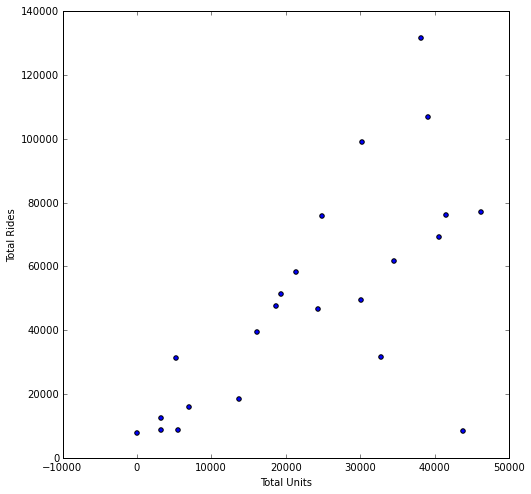

In [15]:
# Plotting a scatter plot between rides and units
pl.figure(figsize=(8, 8))
pl.scatter(finaldata['totUnits'], finaldata['ridesFreq'])
pl.xlabel("Total Units")
pl.ylabel("Total Rides")

In [16]:
# Fitting a linear regression model
model = smf.ols(formula = 'ridesFreq ~ totUnits', data = finaldata).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:              ridesFreq   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     17.52
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           0.000417
Time:                        13:40:43   Log-Likelihood:                -265.50
No. Observations:                  23   AIC:                             535.0
Df Residuals:                      21   BIC:                             537.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    1.23e+04   1.04e+04      1.185      0.2

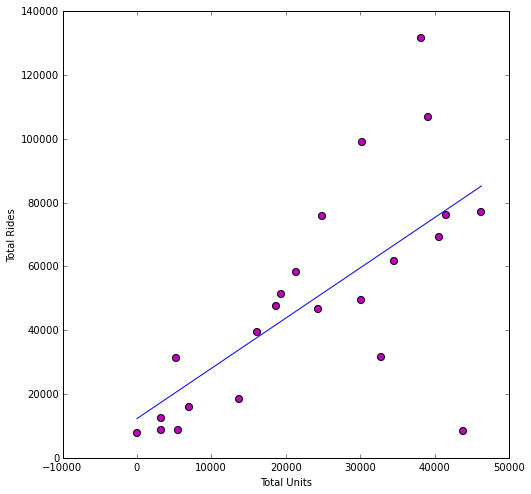

In [17]:
# Fitting the best line from the above model to the scatter points
lower1 = np.min(finaldata['totUnits'])
upper1 = np.max(finaldata['totUnits'])

x1 = pd.DataFrame({'totUnits':np.linspace(lower1, upper1, 10)})
predicted1 = model.predict(x1)

pl.figure(figsize=(8,8))
pl.scatter(finaldata['totUnits'], finaldata['ridesFreq'], s=50, c='m')
pl.plot(x1, predicted1, c='blue')
pl.xlabel('Total Units')
pl.ylabel('Total Rides')

In [18]:
# Fitting a polynomial linear regression line
model = smf.ols(formula = 'ridesFreq ~ 1 + totUnits + I(totUnits ** 2.0)', data = finaldata).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:              ridesFreq   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     10.15
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           0.000905
Time:                        13:40:43   Log-Likelihood:                -264.42
No. Observations:                  23   AIC:                             534.8
Df Residuals:                      20   BIC:                             538.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept          -1042.6278   1.39

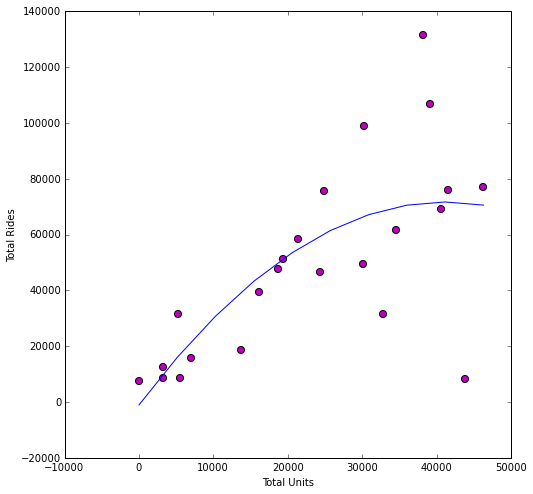

In [19]:
# Plotting the best line from above model to scatter points
lower1 = np.min(finaldata['totUnits'])
upper1 = np.max(finaldata['totUnits'])

x1 = pd.DataFrame({'totUnits':np.linspace(lower1, upper1, 10)})
predicted1 = model.predict(x1)

pl.figure(figsize=(8,8))
pl.plot(x1, predicted1, c='blue')
pl.scatter(finaldata['totUnits'], finaldata['ridesFreq'], s=50, c='m')
pl.xlabel('Total Units')
pl.ylabel('Total Rides')

Likelihood-ratio tests in general statistical modelling, for testing whether there is evidence of the need to move from a simple model to a more complicated one (where the simple model is nested within the complicated one).

### Likelihood Ratio Tests
In statistics, a likelihood ratio test is a statistical test used to compare the goodness of fit of two models, one of which (the null model) is a special case of the other (the alternative model). The test is based on the likelihood ratio, which expresses how many times more likely the data are under one model than the other

log-likelihood ratio statistic = statistic compared from both the models

![alt text](https://upload.wikimedia.org/math/2/2/9/229b472081ce3580881cf29b4e376ef3.png)

#### Interpretation
The model with more parameters will always fit at least as well (have an equal or greater log-likelihood). Whether it fits significantly better and should thus be preferred is determined by deriving the probability or p-value of the difference D. Where the null hypothesis represents a special case of the alternative hypothesis, the probability distribution of the test statistic is approximately a chi-squared distribution with degrees of freedom equal to df2 − df1 .Symbols df1 and df2 represent the number of free parameters of models 1 and 2, the null model and the alternative model, respectively.


Please go through this wikipedia link, it has got simple explanation

https://en.wikipedia.org/wiki/Likelihood-ratio_test


In [20]:
# From the above models we are comparing simple linear and quadratic fit lines
# We are trying to asses whether we are good just with simple linear or with addition of quadratic term
# For this test, we need to compute log-likelihood ratio statistic using values from both the models
# Generally loglikelihood values for each model are present in the model output summary i.e. log likelihood
# So we just need to directly substitute those values in the above mentioned formula and compute D
# df1 and df2 information is obtained from model equation i.e. number of parameters used in each model

# null model: simple linear line
# alternate model: quadratic linear curve

# loglikelihood value for null model: -265.50, df1 = 1
# loglikelihood value for alternate model: -264.42, df2 = 2

D = -2 * (-265.50) + 2 * (-264.42)
print D

2.16


In [21]:
# This D value should be compared with chi-square distribution critical value at 95 % confidence levels
# At 95% and for df=df2-df1 (2-1=1) critical value of chi-square distribution is 3.841
# If D value is greater than critical value, then we reject null hypothesis else we fail to reject

print "Since 2.16 is less than 3.841, we fail to reject NULL hypothesis"
print "Quadratic model is not better than a simple linear line"

Since 2.16 is less than 3.841, we fail to reject NULL hypothesis
Quadratic model is not better than a simple linear line


In [22]:
# Treating outliers for x > 0 and < 40000, also for y values for > 80000
finaldata1 = finaldata[(finaldata['totUnits'] > 0) & (finaldata['totUnits'] < 40000) & (finaldata['ridesFreq'] < 70000)]

In [23]:
# Fitting a linear regression model
model = smf.ols(formula = 'ridesFreq ~ totUnits', data = finaldata1).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:              ridesFreq   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     25.41
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           0.000226
Time:                        13:40:44   Log-Likelihood:                -160.72
No. Observations:                  15   AIC:                             325.4
Df Residuals:                      13   BIC:                             326.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.105e+04   5240.506      2.109      0.0

C:\Users\kiran.pv\AppData\Local\Continuum\Anaconda\lib\site-packages\scipy\stats\stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


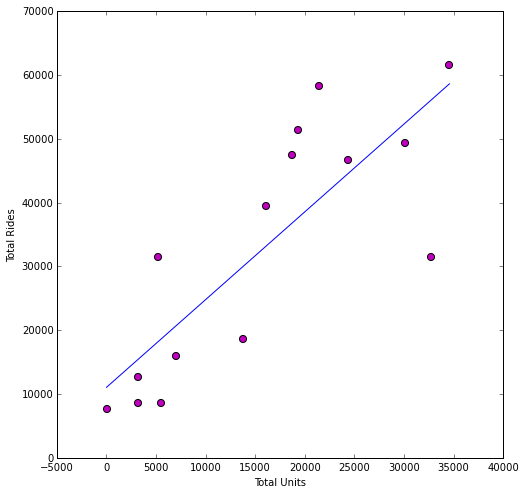

In [24]:
# Fitting the best line from the above model to the scatter points
lower1 = np.min(finaldata1['totUnits'])
upper1 = np.max(finaldata1['totUnits'])

x1 = pd.DataFrame({'totUnits':np.linspace(lower1, upper1, 10)})
predicted1 = model.predict(x1)

pl.figure(figsize=(8,8))
pl.scatter(finaldata1['totUnits'], finaldata1['ridesFreq'], s=50, c='m')
pl.plot(x1, predicted1, c='blue')
pl.xlabel('Total Units')
pl.ylabel('Total Rides')

In [25]:
# Fitting a polynomial linear regression line
model = smf.ols(formula = 'ridesFreq ~ 1 + totUnits + I(totUnits ** 2.0)', data = finaldata1).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:              ridesFreq   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     16.89
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           0.000324
Time:                        13:40:44   Log-Likelihood:                -158.80
No. Observations:                  15   AIC:                             323.6
Df Residuals:                      12   BIC:                             325.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           2745.3986   6538

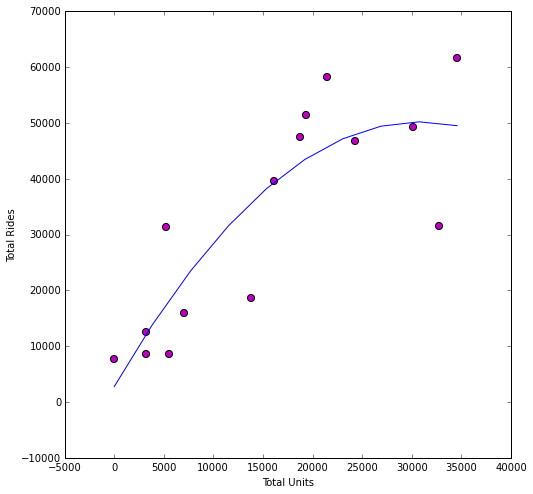

In [26]:
# Plotting the best line from above model to scatter points
lower1 = np.min(finaldata1['totUnits'])
upper1 = np.max(finaldata1['totUnits'])

x1 = pd.DataFrame({'totUnits':np.linspace(lower1, upper1, 10)})
predicted1 = model.predict(x1)

pl.figure(figsize=(8,8))
pl.plot(x1, predicted1, c='blue')
pl.scatter(finaldata1['totUnits'], finaldata1['ridesFreq'], s=50, c='m')
pl.xlabel('Total Units')
pl.ylabel('Total Rides')

In [27]:
# From the above models we are comparing simple linear and quadratic fit lines
# We are trying to asses whether we are good just with simple linear or with addition of quadratic term
# For this test, we need to compute log-likelihood ratio statistic using values from both the models
# Generally loglikelihood values for each model are present in the model output summary i.e. log likelihood
# So we just need to directly substitute those values in the above mentioned formula and compute D
# df1 and df2 information is obtained from model equation i.e. number of parameters used in each model

# null model: simple linear line
# alternate model: quadratic linear curve

# loglikelihood value for null model: -265.50, df1 = 1
# loglikelihood value for alternate model: -264.42, df2 = 2

D = -2 * (-160.72) + 2 * (-158.80)
print D

3.84


In [28]:
# This D value should be compared with chi-square distribution critical value at 95 % confidence levels
# At 95% and for df=df2-df1 (2-1=1) critical value of chi-square distribution is 3.841
# If D value is greater than critical value, then we reject null hypothesis else we fail to reject

print "Since 3.84 is almost same as 3.84, we reject NULL hypothesis"
print "Quadratic model is better than a simple linear line"

Since 3.84 is almost same as 3.84, we reject NULL hypothesis
Quadratic model is better than a simple linear line
